For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __SRIYA VENKATESH__

Step 1: Train your own word embeddings
--------------------------------
### DESCRIPTION OF DATASETS:
### PROVIDED DATASET: SHAKESPEARE PLAYS
#### The shakespeare plays dataset consists of all the works of shakespeare. 
* all the words were in lower case
* the dataset was split into lines
* There were no punctuations in the dataset
* there were no blank lines in the dataset


### CHOSEN DATASET: WAR AND PEACE BY LEO TOLSTOY
* the dataset was preprocessed before the program in BBEedit to remove blank line and convert the dataset to lower case
* the dataset was made into a similar format as the shkespeare plays dataset
* all the words were in lower case
* the dataset was split into lines
* There were no punctuations in the dataset

Similarities between the chosen and provided dataset:
* Both the datasets are in English
* Both the data sets are old literary works written by famous play writers
* both the datasets have a similar format
* the datsets have very few grammatical errors as they are written by famous authors
* they are both old english works and thus have pretty old english in them

Constrasts with chosen provided dataset:
* The vocabulary in the shakespeare plays dataset wa smuch larger than the war and peace datset at 100% o fthe dataset.
* Moreover, the shakespere dataset has a different type of english language as compared to war and peace as the former was written a very long time ago and war and peace much later
* The sentences in war and peace are more continuous and coherent and the grammer is much more esy to understand
* the war and peace dataset has mentions of real world places whereas it is much more fictional in shakespeare



In [1]:
# import your libraries here

from typing import List, Dict


from gensim.models import Word2Vec

from multiprocessing import cpu_count


from gensim.parsing.preprocessing import stem_text, remove_stopwords, strip_punctuation
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams
from sklearn.manifold import TSNE
from os import path
import random
perc = 50
from gensim.models import KeyedVectors
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from pathlib import Path
from collections import Counter




#### PROVIDED DATASET : war_and_peace = './war_and_peace.txt'
#### CHOSEN DATASET : s_s = './shakespeare_plays.txt'

In [2]:
# declaring file paths for the  datasets
war_and_peace = './war_and_peace.txt'
s_s = './shakespeare_plays.txt'

In [3]:

def data_to_sentences(file_path : str)-> list:
    """
    returns : List[List[str]] of all the sentences in the given file
    """
    tokenizer = RegexpTokenizer(r'\w+')
    lines = []
    with open(file_path, "r") as file:
        for line in file:
            line = tokenizer.tokenize(line.rstrip('\n'))

            line.insert(0,'<s>')
            line.append('</s>')
            lines.append(line)
    file.close()
    return lines
    pass

In [4]:
# all sentences in the dataset
all_sentences_wap = data_to_sentences(war_and_peace)
all_sentences_s = data_to_sentences(s_s)

# getting lines of the tokenized data
def get_certain_percent(all_sentences : list) -> list:
    length = len(all_sentences)
    end_of_data = int( length * perc * .01)
    perc_sent = all_sentences[0:end_of_data]
    return perc_sent
pass


In [5]:
sentences_wap = get_certain_percent(all_sentences_wap)
sentences_s = get_certain_percent(all_sentences_s)

In [6]:

def vocabulary(sentences:list):
    """
    returns word_count
    
    """
    word_counts = Counter()
    
    tokens_gen = list(np.concatenate(sentences).flat)
    word_counts = Counter(tokens_gen)
            
    return word_counts
    pass


### a) Train embeddings on GIVEN dataset 
## and 
### b) Train embedding on YOUR dataset

In [7]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]


In [8]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
sg = 1.
window = 5
size = EMBEDDINGS_SIZE
min_count = 1
# workers = cpu_count()
sorted_vocab = 1 


def make_model_file_path(name: str, sentences: list):
    """makes embeddings and saves embeddings
    """

    model = Word2Vec(sentences=sentences, vector_size=size, window=window, min_count=min_count, 
        sg=sg, sorted_vocab=sorted_vocab)

    file_name = f'word2vec.{name}.model'
    
    model_path = f'{name}/model'

    Path(model_path).mkdir(parents=True, exist_ok=True)
    file_path = f'{model_path}/{file_name}'
    model.save(file_path)
    
    return file_path
    pass

def word_vector_file_path(name: str, sentences: list):
    """makes word vectors and saves embeddings
    """
    model = Word2Vec(sentences=sentences, vector_size=size, window=window, min_count=min_count, 
        sg=sg, sorted_vocab=sorted_vocab)

    word_vec = f'word2vec.{name}.wordvectors'
    word_vec = model.wv
    vectors_path = f'{name}/wordvectors'
 
    Path(vectors_path).mkdir(parents=True, exist_ok=True)
    vectors_file_path = f'{vectors_path}/{word_vec}'
    word_vec.save(vectors_file_path)
    return vectors_file_path
    pass

In [9]:


wap_model = Word2Vec(sentences= sentences_wap, vector_size=EMBEDDINGS_SIZE, window=5, min_count=1, sg = 1)
s_model = Word2Vec(sentences= sentences_s, vector_size=EMBEDDINGS_SIZE, window=5, min_count=1, sg = 1)

# saving the model
wap_model.save("sriya_word2vec.model_wap")
s_model.save("sriya_word2vec.model_s")

In [10]:
model_path_s  = make_model_file_path("ss" , sentences_s)
vector_path_s = word_vector_file_path("ss" , sentences_s)
model_path_wap = make_model_file_path("wap", sentences_wap)
vector_path_wap = word_vector_file_path("wap", sentences_wap)

##### calculating vocabulary size

In [11]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
# print('Vocab size {}'.format(len(model.wv.vocab)))

word_to_vec_model_s = Word2Vec.load(model_path_s)



word_to_vec_model_wap = Word2Vec.load(model_path_wap)


In [12]:
# You can save file in txt format, then load later if you wish.
# model.wv.save_word2vec_format('embeddings.txt', binary=False)

# You can save file in txt format, then load later if you wish.
# make sure all the parent folders exists
p = True
e_o = True
b = False

path_embeddings_s = f'{"ss"}/embeddings'
Path(path_embeddings_s).mkdir(parents=p, exist_ok=e_o)
word_to_vec_model_s.wv.save_word2vec_format(f'{path_embeddings_s}/{"ss"}_embeddings.txt', binary=b)

path_embeddings_wap = f'{"wap"}/embeddings'
Path(path_embeddings_wap).mkdir(parents=p, exist_ok=e_o)
word_to_vec_model_wap.wv.save_word2vec_format(f'{path_embeddings_wap}/{"wap"}_embeddings.txt', binary=b)

## What text-normalization and pre-processing did you do and why? 
### PREPROCESSING AND NORMALIZATION:

#### 1.Convert all the words to lower case 
#### 2.Remove punctations
#### 3.Removing all the blank lines in the dataset
* Convert all the words to lower case 
    * Reduces vocabulary size and gives fewer embeddings, this decreases runtime and increases performance       relative to accuracy.
    
* Remove punctations:
    * Reduces vocabulary size and gives fewer embeddings, this decreases runtime and increases performance       relative to accuracy.
    
* removing all the blank lines in the dataset :
    * This prevents any unwanted calculatins and prevents any inaccurate numbers. This was observed by me in HW2 and so I followed it here.




Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [13]:

def most_occuring_words(sentences:str):
    """get the top most common words in the file
    """
    # f the number of most common words
    f = 10
    
    dict_word_counts = vocabulary(sentences)
    
    dict_word_counts["<s>"] = 0
    dict_word_counts["</s>"] = 0
    
    common_words = []
    for j in dict_word_counts.most_common(f):
        common_words.append(j[0])

    return common_words
    pass

### for shakespeare dataset

In [14]:

wv_s = KeyedVectors.load(vector_path_s, mmap='r')
keys_s = most_occuring_words(sentences_s)


### for war and peace data set

In [15]:

wv_wap = KeyedVectors.load(vector_path_wap, mmap='r')
keys_wap = most_occuring_words(sentences_wap)


##### inserting clusters

In [16]:
def word_clusters(model, keys:Dict):
    '''
    returns word_clusters
    '''

    clusters = []
    for w in keys:
        ws = []

        for similar, _ in model.wv.most_similar(w, topn=10):
            ws.append(similar)


        clusters.append(ws)
    return clusters

In [17]:
def generate_embeddings(model, keys:Dict):
    '''
    generate  embedding clusters  
   '''
    clusters = []

    for w in keys:
        emb = []

        for similar, _ in model.wv.most_similar(w, topn=10):

            emb.append(model.wv[similar])
        clusters.append(emb)

    return clusters

##### insert tsne here

In [18]:
def tsne_plot_similar_words(title:str, labels, embedding_clusters, word_clusters, a:float, perplexity:int, filename:str=None):
    """
    function to plot similar words
    """
    embedding_clusters = np.array(embedding_clusters)
    f, g, h = embedding_clusters.shape
    
    model_en_2d_tsne = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter = 3500, random_state= 33)
    embeddings_tsne = np.array(model_en_2d_tsne.fit_transform(embedding_clusters.reshape(f * g, h))).reshape(f, g, 2)

    plt.figure(figsize=(16, 9))
    
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embeddings_tsne, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

## SHAKESPEARE PLAYS PLOTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

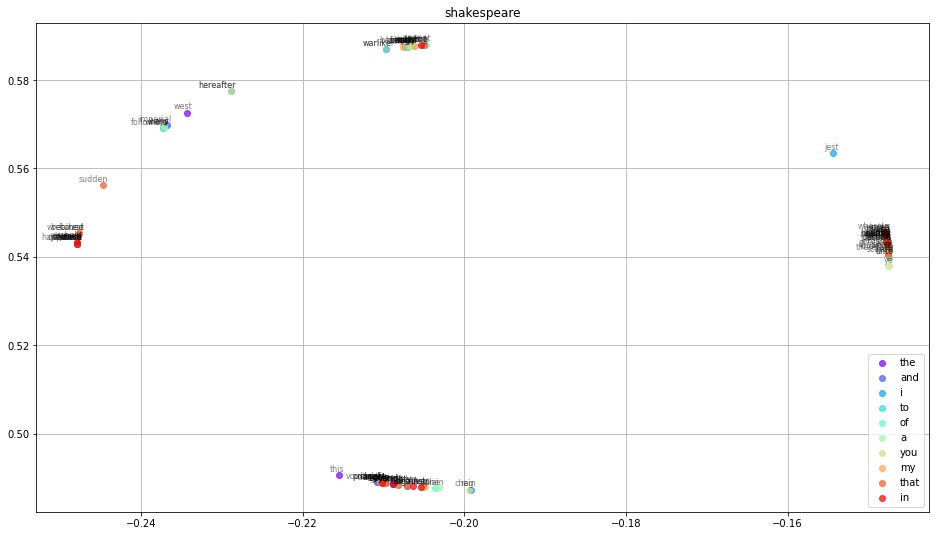

In [49]:


embeddings_clusters_s = generate_embeddings(word_to_vec_model_s, keys_s)
word_clusters_s = word_clusters(word_to_vec_model_s, keys_s)


folder_path_s_img = f'{"ss"}/images'
Path(folder_path_s_img).mkdir(parents=True, exist_ok=True)
plot_file_path_s = f'{folder_path_s_img}/similar_words_perplexity_{"90"}.png'


tsne_plot_similar_words (f'{"shakespeare"}',keys_s, embeddings_clusters_s, word_clusters_s, 0.7, 100,
    plot_file_path_s)

## WAR AND PEACE PLOTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

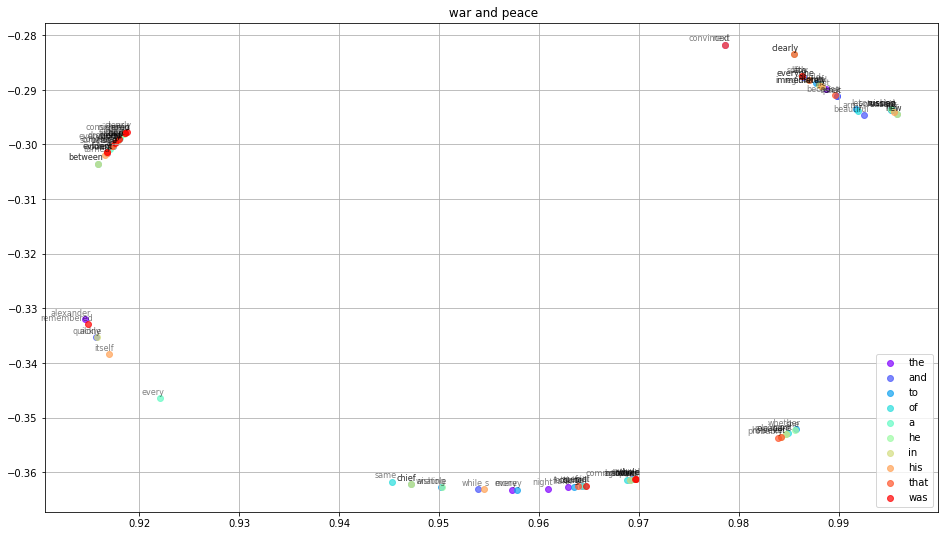

In [20]:


embeddings_clusters_wap = generate_embeddings(word_to_vec_model_wap, keys_wap)
word_clusters_wap = word_clusters(word_to_vec_model_wap, keys_wap)


folder_path_wap_img = f'{"wap"}/images'
Path(folder_path_wap_img).mkdir(parents=True, exist_ok=True)
plot_file_path_wap = f'{folder_path_wap_img}/similar_words_perplexity_{"200"}.png'


tsne_plot_similar_words(f' {"war and peace"}', keys_wap, embeddings_clusters_wap, word_clusters_wap, 0.7, 100 ,
    plot_file_path_wap)

## Write down your analysis:

### Generating graphs:
* The projection was generated for the top 10 words that are similar. 
* Then, embedding clusters and word clusters are generated for the 10 words andprojection graphs are created. 
* Analysis: After experimentiing wiht a range of different perplexities I found that 100 was the best. For ranges around 100, there were convergence for both the datasets,
* The convergence was greatest at the range from 95 to 103. 

### Describe Shakespeare plays
* In this projection with a perplexity of 100, there are. 
* The top three groups are pretty much tightly clustered
* In the bottom of the graph there is a tight cluster again and there are scattered data points to the right and nothing in the center of the graph. 
* In the bottoom, the datapoints unravel slowly with 2 single outliers that are on top of each other. 

### Describe war and peace
* There are 6 groups roughly speaking in the war and peace dataset.
* The clusters in the top left and top right corner have a largenumber of datapoints. 
* The group on the bottom is scattered a lot. 
* There are two outliers between the top and bottom left groups.
* There are some goups that are arranged very loosely in the bottom of the graph.

### Compare and contract the embeddings
* The shakespeare dataset appeared to have the two densest clusters at the opposing bottom and right corners 
* The war and peace dataset has data that is clustered in the both sides of the grapgh and a  little loosely clustered at the bottom. 
* When we compare the two datasets, both the embeddings are easily seperated into closely related groups,
* but in the war and peace dataset there are more groups than in the shakespeare dataset and the Covid embeddings suggest that the words themselves are less related. 
* This shows that war and peace covers a very different set of words and shakespeare datset has many different words for the same root word.


Cite your sources:
-------------

1. https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d


2. https://radimrehurek.com/gensim/models/word2vec.html

3. https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [21]:


# Importing utility functions from Keras
from keras.layers import Input
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 


# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)

# ENCODING TEXT TO INTEGERS FOR GIVEN DATASET: SHAKESPEARE
tokenizer_s = Tokenizer()
tokenizer_s.fit_on_texts(sentences_s)
encoded_sentences_s = tokenizer_s.texts_to_sequences(sentences_s)


# ENCODING TEXT TO INTEGERS FOR CHOSEN: WAR AND PEACE
tokenizer_wap = Tokenizer()
tokenizer_wap.fit_on_texts(sentences_wap)
encoded_sentences_wap = tokenizer_wap.texts_to_sequences(sentences_wap)



In [22]:



def read_embeddings(model: list, tokenizer : Tokenizer):
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    
    # seperating sequences
    
    # for the given dataset
    word_to_embedding = dict(zip(model.wv.index_to_key,  model.wv.vectors))
    index_to_embedding = {}

    for i in word_to_embedding:
        index_to_embedding[tokenizer.word_index[i]] = word_to_embedding[i]
        
    return  index_to_embedding
    
    pass



In [23]:
index_to_embedding_s = read_embeddings(word_to_vec_model_s, tokenizer_s)
index_to_embedding_wap = read_embeddings(word_to_vec_model_wap, tokenizer_wap)

In [24]:

vocabulary_s = vocabulary(sentences_s).keys()

vocabulary_wap = vocabulary(sentences_wap).keys()

vocab_s = list(vocabulary_s)  
    
vocab_wap = list(vocabulary_wap)



### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [25]:

def generate_ngram_training_samples(encoded_sentences: list) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    training_samples = []
    single_gram = []
    for line in encoded_sentences:
        single_gram = [line[i:i + (NGRAM+1)] for i in range(len(line) - (NGRAM+1) + 1)]
        training_samples += single_gram        

    return training_samples

In [26]:
generated_ngrams_s = generate_ngram_training_samples(encoded_sentences_s)
generated_ngrams_wap = generate_ngram_training_samples(encoded_sentences_wap)

### c) Then, split the sequences into X and y and create a Data Generator

In [27]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [28]:

def seperate_sequences(sequence : list):
    """
    # Note here that the sequences were in the form: 
    # sequence = [x1, x2, ... , x(n-1), y]
    # We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]s
    """
    
    X = []
    Y = []
    
    for i in sequence:
        X.append(i[0:(NGRAM)])
        Y.append(i[-1])
    
    return X, Y
    pass

In [29]:
X_s, Y_s = seperate_sequences(generated_ngrams_s)

X_wap, Y_wap = seperate_sequences(generated_ngrams_wap)

In [30]:

def encoded_to_input_data(index_to_embedding : dict, X : list, y : list):
    """
    convert the encoded data into data for the data generator. 
    Converts X to embedded data
    converts y to categorical data
    """
    # data_generator function    
    one_hot = []
    embeddings = []
    allArrays = np.array([])

    for j in X:
        
        allArrays = np.concatenate( [index_to_embedding[x] for x in j] )  
        # allArrays = np.reshape(allArrays,(1, len(allArrays)))
        embeddings.append(allArrays)
        
    all_y = to_categorical(y)    
       
    return embeddings,all_y
    pass

In [31]:
X_embeddings_s, Y_embeddings_s = encoded_to_input_data(index_to_embedding_s, X_s, Y_s)
X_embeddings_wap, Y_embeddings_wap = encoded_to_input_data(index_to_embedding_wap, X_wap, Y_wap)

In [32]:
# Examples
# initialize data_generator
num_num_sequences_per_batch_batch = 1280 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical



def data_generator(X_embeddings: List, y_embeddings: List, num_sequences_per_batch: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    total_number_of_embeddings = len(X_embeddings)
    per_epoch_steps = total_number_of_embeddings//num_sequences_per_batch
    cur_pos = 0
    while True:
        num = int(cur_pos % per_epoch_steps)
        st = (num) * num_sequences_per_batch
        ed = (num + 1) * num_sequences_per_batch
        x_emb = np.array(X_embeddings[st:ed])
        y_emb = np.array(y_embeddings[st:ed])
        
        yield x_emb,y_emb
        
        cur_pos += 1

        
def create_generator(X_embeddings, Y_embeddings):
    steps_per_epoch = len(X_embeddings)//num_num_sequences_per_batch_batch 
    ngram_generator = data_generator(X_embeddings, Y_embeddings ,num_num_sequences_per_batch_batch)
    return ngram_generator, steps_per_epoch

In [33]:
# Examples
# initialize data_generator
# num_sequences_per_batch = 128 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical


ngram_generator_s, steps_per_epoch_s = create_generator(X_embeddings_s, Y_embeddings_s)
ngram_generator_wap, steps_per_epoch_wap = create_generator(X_embeddings_wap, Y_embeddings_wap)



### d) Train your models

In [34]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API




def create_model(input_size:int, vocab_size:int):
    """ 
    creates a neural network model and returns it
    """
    # Define the model architecture using Keras Sequential API
    model = Sequential()
    ip_size = NGRAM*EMBEDDINGS_SIZE
    model.add(Input((input_size, ip_size)))
    model.add(Dense(ip_size, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))

    return model


### SHAKESPEARE PLAYS MODEL

In [35]:

embedding_length_s = len(X_embeddings_s)
vocabulary_length_s = len(Y_embeddings_s[1])

model_s = create_model(embedding_length_s, vocabulary_length_s)
print(model_s.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 449383, 600)       360600    
_________________________________________________________________
dense_1 (Dense)              (None, 449383, 17843)     10723643  
Total params: 11,084,243
Trainable params: 11,084,243
Non-trainable params: 0
_________________________________________________________________
None


In [36]:

# Start training the model
l_rate = 0.1
model_s.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=l_rate), metrics=['accuracy'])

model_s.fit(x=ngram_generator_s, steps_per_epoch=steps_per_epoch_s, epochs=1)

351/351 [==============================] - 492s 1s/step - loss: 7.6973 - accuracy: 0.0377


### WAR AND PEACE MODEL

In [37]:

embedding_length_wap = len(X_embeddings_wap)
vocabulary_length_wap = len(Y_embeddings_wap[1])


model_wap = create_model(embedding_length_wap, vocabulary_length_wap)
print(model_wap.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 258538, 600)       360600    
_________________________________________________________________
dense_3 (Dense)              (None, 258538, 12802)     7694002   
Total params: 8,054,602
Trainable params: 8,054,602
Non-trainable params: 0
_________________________________________________________________
None


In [38]:

l_rate = 0.1
model_wap.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=l_rate), metrics=['accuracy'])

model_wap.fit(x=ngram_generator_wap, steps_per_epoch=steps_per_epoch_wap, epochs=1)

201/201 [==============================] - 207s 1s/step - loss: 7.4191 - accuracy: 0.0963


### e) Generate Sentences

In [39]:
# converts the inut seed to embeddings
def convert_input_to_embedding(tokenizer, input_sequence : list, index_to_embedding: dict):
    
    embeddings = []   
    encoded_in = tokenizer.texts_to_sequences(input_sequence)

    encoded_input = [ item for elem in encoded_in for item in elem]

    allArrays = np.concatenate( [index_to_embedding[x] for x in encoded_input] )  
  
    return allArrays
    pass



In [40]:

def get_next_word(index_to_embedding: dict, tokenizer, model, vocabulary: list, seed: list) -> str:
    """
    returns a word generated
    """

    embeddings_array = []
    
    sent_emb = convert_input_to_embedding(tokenizer, seed, index_to_embedding)
    
    embeddings_array.append(sent_emb)

    embeddings_array = np.array(embeddings_array)

    prob_matrix = model.predict(embeddings_array)
    
    random_index = len(prob_matrix[0])
    
    probability = prob_matrix[0]                   

    next_word_index = np.random.choice(np.arange(random_index), 1, p = probability)[0]         

    
    next_word = vocabulary[next_word_index]
    return next_word

In [41]:


def generate_random_seed(X : list, vocabulary_words: list )-> list:
    
    total_len_of_seq = len(X)
    random_number = random.randint(0, total_len_of_seq - 1)
    sample_seed = X[random_number]
    seed = []

    for index in sample_seed:
        seed.append(vocabulary_words[index])
    return seed
    pass



In [42]:

def generate_seq(vocabulary: dict, index_to_embedding: dict, model, tokenizer, n_words: int, seed: list):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''

    generated_sequence = []
    
    for i in range(0, n_words):
        next_word = get_next_word(index_to_embedding, tokenizer, model, vocabulary, seed)
        generated_sequence.append(next_word)
        
        seed.append(next_word)
        seed.pop(0)
        
    final_str = " ".join(generated_sequence)
    return final_str
    pass


In [43]:

seed_s = generate_random_seed(X_s , vocab_s)
seed_wap = generate_random_seed(X_wap , vocab_wap)


### 25 SENTENCES PRINTED BY THE SHAKEASPEARE MODEL

In [44]:
NUMBER_OF_SENTENCES_TO_PRINT = 25
for i in range(0, NUMBER_OF_SENTENCES_TO_PRINT):
    generated_sentence_s = generate_seq(vocab_s, index_to_embedding_s, model_s, tokenizer_s, 20, seed_s) 
    print(i+1, " : " ,generated_sentence_s)
    print("      ")

1  :  sepulchres cook grow florence sima nobleman winged bounties knapp provender briefest malignant deesse cytherea invectives rudder des nature friend lark
      
2  :  record screw sing shall bounties agrippa follower respecting kam tippling paintings sincerely sharpness audacious bounties retiring franchises rosencrantz often rottenness
      
3  :  fetches loseth abundantly coating flamens lace nostril seld propounded thomas root unquestionable befall undid excellent rousillon steward with him lord
      
4  :  friend work enter son well that clown s dramatis perpendicular forked aides fruitless rarities prescriptions jennet forenoon ganymede colours grown
      
5  :  by warrant spur divorcing ruin threescore default bunghole basket unelected converses reflecting truncheoners trump thirsts neglectingly and france death mariana
      
6  :  loads dazzles instigations bachelor life an of that abroad cheering famous bullcalf border sons france forgetful restless situation jeshu cala

### 25 SENTENCES PRINTED BY THE WAR AND PEACE MODEL

In [45]:
NUMBER_OF_SENTENCES_TO_PRINT = 25
for i in range(0, NUMBER_OF_SENTENCES_TO_PRINT):
    generated_sentence_wap = generate_seq(vocab_wap, index_to_embedding_wap, model_wap, tokenizer_wap, 20, seed_wap) 
    print(i+1, " : " ,generated_sentence_wap)
    print("      ")

1  :  family i infamies i swarming portend rebels courtier deepened turmoil flashed slim heed nostitz highfalutin actor nonreceipt fourth epoch stoutness
      
2  :  estates attending breadth spilt took news hundredweight fleas wider bolkónski acquainted knowing that warn detailed puzzled heated blank inaccessible shining
      
3  :  suffering prince cleverest candles i appeal turtle scene massive vigor circumstance beardless monkey gasconades termination solved expression becomes shelf steppe
      
4  :  opera clear quench inadequacy novel offensively staking conferring traces wild seekers greeting convoyman aboveboard amazing father bravery trotted comprehension finger
      
5  :  banister touches quivered berlin devait 30 mosquitoes seek suspense pat measured give proposes man infamies shop kempis outbuildings expression valleys
      
6  :  carpets gratefully effects insistence awkward improving estates anna utterly </s> weak conversation greeted hundreds charmed distance glitt

#### SENTENCES GENRATED  BY THE HW2 MODEL
##### BI GRAM LAPLACE SMOOTHED
* can be close maybe we like 
* vegetarian food 
* are there a
* okay why don't
* i would like 
* what about cafe de
* can you have 
* hi i'm </s>
* oh i would like </s>
* i want to </s>
* how about </s>
* do you </s>
* where's <UNK> </s>
* i think i </s>
* computer uh </s>
* i can you have </s>
* i would like </s>
* let's start over </s>
* i'm in berkeley </s>
* i only go </s>
* please </s>
* i would like </s>
* how about </s>
* i want to </s>
* list </s>
* do they have </s>
* cafe can </s>
* it could </s>
* i want some </s>
* how expensive </s>
* i'd like to </s>
* an italian </s>
* tell me </s>
*  okay i </s>
* tell me </s>
* i'm willing to </s>
* i want cambodian restaurants </s>
* i'd like to </s>
* howbout san__francisco </s>
* i'd like i like </s>
* start over </s>
* can i </s>
* i see the </s>
* can i </s>
* could you give me </s>
* i <UNK> </s>
* okay go </s>
* i'd like to </s>
* um i </s>
* i don't want to </s>

### f) Compare your generated sentences



#### Answer the question: Do your neural language models produce n-grams that were not observed during training? (1 paragraph, you may support this answer with code as desired).

The model can produce n grams thatare not sen during training. This is because it is rare for a dataset to cover all the n grams in a given corpus.
For example , the n gram "he said that". The n gram can be permutated to "said that he". Thsi n gram will not be observed during training as it is a new ngram which is generated and cannot be found in the corpus.
If the words are closely linked, like "he," "said," and "that," it is feasible that the model will construct a sequence using these words that was not encountered in the training dataset.
Let's take a look at this scenario in terms abstract letters. Take the sentence "a b c d c b a". Taking naivebayes into consideration, given the initial character "d", the only number that could be generated with probabilities from the matrix would be "c."
Examine the letter "d c."
The numbers "b" and "d" appear after "c."
Given that "c" can follow "d" and "d" can follow "c," the sequence "d c d" can be created.
Given a seed of "d c," the model in our word embeddings scenario may predict the next value to be "b" or "d" because the embeddings should be similar. 
 If we apply this concept to a much bigger vocabulary and a model trained on many more sequences, we can construct a character n after (n-1) that has never appeared two positions before (n-2).
The character's location is denoted by n. 

### Compare your generated sentences:

* The sentences generated by the neural network are not that meaningful and coherent. 
* This wa sbecause the model had a very low accuracy.
* Grammar:
    * the words generated by the homework 2 model were more grammatically correct
    * the sentences generated by this neural network did not follow a proper grammatical pattern
* Example from HW@ "- \ could you give me \". 
* Example from HW4 " man corpse screened censured lied latitude altering loathe fearful ulyulyulyu châle fatherland ruling anteroom frank mademoiselle teatime triumph pétya marrying"
* As we can see it does not make much grammatical sense
* The reason for this is the simple architecture of our neural network.
* This dataset also seemed to be relatively small, but we don't have enough context to make that judgement.
* Neural models are much better when provided with ore data and training time. They can store a lot more data, which necessitates more data and a more intelligent architecture in order to extract good findings. 

Sources Cited
----------------------------




1. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
    
2. https://blog.paperspace.com/pre-trained-word-embeddings-natural-language-processing/
    
3. https://www.tensorflow.org/text/guide/word_embeddings
4. https://radimrehurek.com/gensim/models/word2vec.html
5. https://hemantranvir.medium.com/spam-detection-using-rnn-simplernn-lstm-with-step-by-step-explanation-    530367608071
6. https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

7. https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/
